# 收集数据
- WeRateDogs 的推特档案数据获取
- 推特图像的预测数据

In [226]:
import requests
import pandas as pd
pd.options.display.max_columns=200
pd.set_option('max_colwidth',100)

In [227]:
twitter_archive_enhanced=pd.read_csv("twitter-archive-enhanced.csv")

In [228]:
twitter_archive_enhanced.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and sh...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/st...",12,10,Franklin,None,None,None,None


In [229]:
import requests 
with open("image-predictions.tsv",mode='wb') as f:
    file = requests.get('https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv')
    f.write(file.content)
    

In [230]:
from io import BytesIO
with open("image-predictions.tsv",mode='wb') as f:
    f.write(file.content)

In [231]:
image_predictions=pd.read_csv("image-predictions.tsv",sep="\t")  

In [232]:
image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [233]:
import json
with open("tweet_json.txt") as f:
        data={"id":[],"retweet_count":[],"favorite_count":[]}
        for line in f.readlines():
                json_obj=json.loads(line)
                data['id'].append(json_obj['id'])
                data['retweet_count'].append(json_obj['retweet_count'])
                data['favorite_count'].append(json_obj['favorite_count'])
        tweet_json=pd.DataFrame(data)

In [234]:
tweet_json.head(5)

,id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016


# 对项目数据进行评估

## twitter_archive_enhanced

In [235]:
twitter_archive_enhanced.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available fo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD3...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and sh...",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/st...",12,10,Franklin,None,None,None,None


In [236]:
twitter_archive_enhanced.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unpl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [237]:
twitter_archive_enhanced.columns.values.tolist()

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [238]:
twitter_archive_enhanced.source.sample(8)

215     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1460    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1765    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1671    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
847     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
1521    <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
461     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
631     <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
Name: source, dtype: object

twitter_archive_enhanced的属性有以下：

tweet_id：推特ID

in_reply_to_status_id：回复ID

in_reply_to_user_id：被回复推文原始用户ID

timestamp：发tweet的时间戳

source：tweet来源（移动端或web端）

text：推文内容

retweeted_status_id：转发ID

retweeted_status_user_id：转发用户ID

retweeted_status_timestamp：转发时间

expanded_urls：推文链接

rating_numerator：评分分子

rating_denominator：评分分母

name：狗狗的名字

doggo：狗的成长阶段

floofer：狗的成长阶段

pupper：狗的成长阶段

puppo: 狗的成长阶段

In [239]:
### 查看整体数据情况
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

从info来看，twitter_archive_enhanced总共有2356条

in_reply_to_status_id，in_reply_to_user_id只有78，数据缺失程度太大，建议去除

timestamp的数据类型应该化成标准的时间格式，应进行数据转化

retweeted_status_id，retweeted_status_user_id，retweeted_status_timestamp 只有181，数据缺失程度比较高，去除


In [240]:
twitter_archive_enhanced.tweet_id.value_counts().max()

1

tweet_id 不存在重复的现象，可以当成主键

In [241]:
twitter_archive_enhanced.timestamp.sample(7)

1262    2016-03-16 16:29:35 +0000
1048    2016-06-16 01:25:36 +0000
1422    2016-02-12 16:16:41 +0000
732     2016-09-29 16:03:01 +0000
1991    2015-12-04 03:43:54 +0000
1431    2016-02-10 20:23:19 +0000
1363    2016-02-25 19:04:13 +0000
Name: timestamp, dtype: object

In [242]:
twitter_archive_enhanced.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [243]:
twitter_archive_enhanced.text.sample(7)

1940               The millennials have spoken and we've decided to immediately demote to a 1/10. Thank you
1761    Exotic pup here. Tail long af. Throat looks swollen. Might breathe fire. Exceptionally unfluffy ...
2112    Two unbelievably athletic dogs here. Great form. Perfect execution. 10/10 for both https://t.co/...
1965    This is Gerald. He's a fluffy lil yellow pup. Always looks like his favorite team just lost on a...
969     This is Stewie. He will roundhouse kick anyone who questions his independence. 11/10 free af htt...
665     This is Mosby. He appears to be rather h*ckin snuggable af. 12/10 keep it up Mosby https://t.co/...
54      This is Gary. He couldn't miss this puppertunity for a selfie. Flawless focusing skills. 13/10 w...
Name: text, dtype: object

In [244]:
twitter_archive_enhanced.text.value_counts().max()

1

In [245]:
# pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.option_context('display.max_rows', None, 'display.max_columns', None)

In [246]:
import random
random.randint(0,10)
twitter_archive_enhanced.shape

(2356, 17)

In [247]:
for i in range(5):
    print(twitter_archive_enhanced.text.loc[random.randint(0,twitter_archive_enhanced.shape[0])])
    print("\n")

Here's a doggo blowing bubbles. It's downright legendary. 13/10 would watch on repeat forever (vid by Kent Duryee) https://t.co/YcXgHfp1EC


This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M


Yea I can't handle the cuteness anymore. Curls for days. 12/10 for all https://t.co/sAI6gCGZYX


Say hello to Levi. He's a Madagascan Butterbop. One of the more docile Butterbops I've seen. 12/10 would give all the pets https://t.co/Zcw9Sccctc


This is Toby. He asked for chocolate cake for his birthday but was given vanilla instead. 8/10 it'll be ok Toby https://t.co/sYi2G0he4H




In [248]:
twitter_archive_enhanced.expanded_urls.sample(7)

2170                                        https://twitter.com/dog_rates/status/669351434509529089/photo/1
333     https://twitter.com/dog_rates/status/832757312314028032/photo/1,https://twitter.com/dog_rates/st...
186                                                                                                     NaN
1344                                        https://twitter.com/dog_rates/status/704499785726889984/photo/1
1279    https://twitter.com/dog_rates/status/708845821941387268/photo/1,https://twitter.com/dog_rates/st...
72                                                   https://twitter.com/bbcworld/status/878599868507402241
1186    https://twitter.com/dog_rates/status/718540630683709445/photo/1,https://twitter.com/dog_rates/st...
Name: expanded_urls, dtype: object

In [249]:
twitter_archive_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [250]:
rating_denominator=twitter_archive_enhanced.rating_denominator.value_counts()
twitter_archive_enhanced.query("rating_denominator!=10")[["rating_numerator","rating_denominator"]]

,rating_numerator,rating_denominator
313,960,0
342,11,15
433,84,70
516,24,7
784,9,11
902,165,150
1068,9,11
1120,204,170
1165,4,20
1202,50,50


In [251]:
index=twitter_archive_enhanced.query("rating_denominator!=10")[["rating_numerator","rating_denominator"]].index
for i in index:
    print(twitter_archive_enhanced.text.loc[i])
    print(twitter_archive_enhanced.rating_numerator.loc[i])
    print(twitter_archive_enhanced.rating_denominator.loc[i])
    print("\n")

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
960
0


@docmisterio account started on 11/15/15
11
15


The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
84
70


Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
24
7


RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
9
11


Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
165
150


After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
9
11


Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
204
170


Happy 4/20 from the squad! 13/10 for all htt

In [252]:
twitter_archive_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [253]:
twitter_archive_enhanced[["rating_numerator","rating_denominator"]].sample(10)

,rating_numerator,rating_denominator
1849,11,10
1115,11,10
2010,10,10
1225,10,10
98,12,10
753,13,10
1015,11,10
278,12,10
1138,12,10
1152,11,10


In [254]:
twitter_archive_enhanced.query("rating_denominator != 10").rating_denominator.count()/twitter_archive_enhanced.rating_denominator.count() * 100

0.97623089983022071

In [255]:
twitter_archive_enhanced.query("rating_numerator > rating_denominator").rating_denominator.count()/twitter_archive_enhanced.rating_denominator.count() * 100

61.587436332767396

In [256]:
twitter_archive_enhanced.name.value_counts()

None            745
a                55
Charlie          12
Cooper           11
Lucy             11
Oliver           11
Lola             10
Penny            10
Tucker           10
Bo                9
Winston           9
the               8
Sadie             8
Daisy             7
Buddy             7
an                7
Toby              7
Bailey            7
Rusty             6
Dave              6
Bella             6
Jack              6
Scout             6
Milo              6
Koda              6
Leo               6
Jax               6
Oscar             6
Stanley           6
Louis             5
Bentley           5
Gus               5
Alfie             5
Larry             5
Oakley            5
Phil              5
Sammy             5
Finn              5
George            5
very              5
Chester           5
Sunny             5
Maddie            4
Loki              4
Jerry             4
just              4
Riley             4
Clarence          4
Clark             4
Duke              4


In [257]:
index=twitter_archive_enhanced.query("name=='an'").index
for i in index:
    print(twitter_archive_enhanced.text.loc[i])
    print(twitter_archive_enhanced.name.loc[i])
    print("\n")

RT @dog_rates: This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR
an


This is an Iraqi Speed Kangaroo. It is not a dog. Please only send in dogs. I'm very angry with all of you ...9/10 https://t.co/5qpBTTpgUt
an


This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR
an


This is an Irish Rigatoni terrier named Berta. Completely made of rope. No eyes. Quite large. Loves to dance. 10/10 https://t.co/EM5fDykrJg
an


This is an extremely rare horned Parthenon. Not amused. Wears shoes. Overall very nice. 9/10 would pet aggressively https://t.co/QpRjllzWAL
an


This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv
an


This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc
an




In [258]:
twitter_archive_enhanced[["doggo","floofer","pupper","puppo"]].sample(8)

,doggo,floofer,pupper,puppo
749,None,None,None,None
1164,None,None,None,None
1527,None,None,None,None
47,None,None,None,None
514,None,None,None,None
2152,None,None,None,None
613,None,None,None,None
1963,None,None,None,None


In [259]:
image_predictions.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [260]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [261]:
image_predictions.jpg_url.duplicated().value_counts()

False    2009
True       66
Name: jpg_url, dtype: int64

#### 质量
##### `twitter_archive_enhanced` 表格
1. tweet_id 应为str类型，而不是int
2. 缺失值过多的列删除，in_reply_to_status_id，in_reply_to_user_id,retweeted_status_id，retweeted_status_user_id，retweeted_status_timestamp
3. 转发的信息的列应该删除  'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp',
3. 数据部分缺失，expanded_urls数据量为2297
3. timestamp的数据类型应该化成标准的时间格式，应进行数据转化
4. 评分分母不全为10，可从text中重新提取
5. source保留着html标签,应去除html标签
6. 狗狗名字存在缺失值,而且名字“a”,"an"应该不为狗狗名字，应该是信息提取错误

##### `image_predictions` 表格
1. image_predictions表中的图片url存在重复，需要删除
3. tweet_id列的数据类型不正确。


#### 清洁度
- doggo、floofer、pupper、puppo 四列可融合成一列；
- 应该将image_predictions与tweet_json这两个表格应该与twitter_archive_enhanced合并，通过tweet id 将3个表格合并为一个表格。



# 清理

In [262]:
# 复制数据集
archive_enhanced_clean = twitter_archive_enhanced.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean= tweet_json.copy()

In [263]:
archive_enhanced_clean.tweet_id = archive_enhanced_clean.tweet_id.astype(str)

In [264]:
type(archive_enhanced_clean.tweet_id[0])

str

In [265]:
archive_enhanced_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1,inplace=True)

In [266]:
archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2356 non-null object
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 276.2+ KB


In [267]:
archive_enhanced_clean = archive_enhanced_clean.loc[archive_enhanced_clean.retweeted_status_id.isnull()]
archive_enhanced_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)

In [268]:
archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(2), object(10)
memory usage: 220.9+ KB


In [269]:
archive_enhanced_clean = archive_enhanced_clean.loc[archive_enhanced_clean.expanded_urls.notnull()]

In [270]:
archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2117 non-null object
timestamp             2117 non-null object
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
dtypes: int64(2), object(10)
memory usage: 215.0+ KB


In [271]:
archive_enhanced_clean['timestamp'] = pd.to_datetime(archive_enhanced_clean.timestamp)

In [272]:
archive_enhanced_clean.timestamp.dtypes

dtype('<M8[ns]')

In [273]:
import re
import numpy as np
#查找所有分母为10的评分,如果有超过两个的评分用&相连
df_rating=[]
pattern = re.compile(r'\d+\/10')
for text in archive_enhanced_clean.text:
    rate=pattern.findall(text)
    df_rating.append(rate)
#加入数据集
# print(df_rating)
archive_enhanced_clean['rating']=df_rating
#转化成str，同时存在两种类型分类用&连接
archive_enhanced_clean['rating']=archive_enhanced_clean['rating'].apply(lambda x:'&'.join(x) if len(x)>1 else ''.join(x))

#将缺失值替换为np.nan
archive_enhanced_clean['rating']=archive_enhanced_clean['rating'].replace('',np.nan)


In [274]:
archive_enhanced_clean['rating'].value_counts()

12/10               488
10/10               426
11/10               415
13/10               296
9/10                153
8/10                 96
7/10                 50
14/10                41
6/10                 32
5/10                 32
3/10                 19
4/10                 14
2/10                  9
1/10                  4
10/10&7/10            3
0/10                  2
11/10&8/10            2
10/10&4/10            2
8/10&1/10             1
4/10&13/10            1
9/10&2/10             1
7/10&8/10             1
75/10                 1
26/10                 1
420/10                1
8/10&11/10            1
10/10&11/10           1
12/10&11/10           1
10/10&8/10            1
10/10&6/10            1
10/10&7/10&12/10      1
10/10&10/10           1
1776/10               1
10/10&5/10            1
5/10&8/10             1
5/10&10/10            1
27/10                 1
11/10&10/10           1
Name: rating, dtype: int64

In [275]:
#查看评分分子超过2位或者包含多个评分的文本内容
archive_enhanced_clean.text[archive_enhanced_clean['rating'].str.len()>6]

766     "Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing http...
979                          This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh
1007    This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 resp...
1222    Meet Travis and Flurp. Travis is pretty chill but Flurp can't lie down properly. 10/10 &amp; 8/1...
1359    This is Socks. That water pup w the super legs just splashed him. Socks did not appreciate that....
1459    This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (...
1465    Meet Oliviér. He takes killer selfies. Has a dog of his own. It leaps at random &amp; can't bark...
1508    When bae says they can't go out but you see them with someone else that same night. 5/10 &amp; 1...
1525    This is Eriq. His friend just reminded him of last year's super bowl. Not cool friend\n10/10 for...
1538    Meet Fynn &amp; Taco

In [276]:
sum(archive_enhanced_clean['rating'].str.len()>6)


23

In [277]:
#针对要修改的部分新建dic
dic={766:'12/10',1359:'9/10',1459:'4/10',1508:'5/10',
     1525:'10/10',1897:'10/10',1970:'8/10',2010:'10/10',
     2064:'8/10',2216:'8/10',2263:'4/10'}
for (key,value) in dic.items():
    archive_enhanced_clean.loc[key,'rating']=value

In [278]:
sum(archive_enhanced_clean['rating'].str.len()>6)

12

In [279]:
archive_enhanced_clean.drop(archive_enhanced_clean[['rating_numerator','rating_denominator']],axis=1,inplace=True)

In [280]:
archive_enhanced_clean.source = archive_enhanced_clean.source.str.extract('>(.+)<',expand = True)

In [281]:
archive_enhanced_clean.source.value_counts()

Twitter for iPhone     1985
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

In [282]:
#从text提取宠物名信息
archive_enhanced_clean['name'] = archive_enhanced_clean.text.str \
.findall('(?:This is|named|Meet|Say hello to|name is|Here we have|Here is)\s([A-Z][^\s.,]*)')
#转化成str，同时存在两种名字用,连接
archive_enhanced_clean['name'] = archive_enhanced_clean['name'].apply(lambda x: ','.join(set(x)))
#将缺失值替换为np.nan
archive_enhanced_clean['name']=archive_enhanced_clean['name'].replace('',np.nan)

### 

In [283]:
#检查结果
archive_enhanced_clean['name'].value_counts()

Charlie        11
Lucy           11
Cooper         10
Oliver         10
Penny           9
Tucker          9
Winston         8
Lola            8
Sadie           8
Toby            7
Daisy           7
Bo              6
Stanley         6
Bella           6
Bailey          6
Jax             6
Oscar           6
Koda            6
Dave            5
Rusty           5
Milo            5
Chester         5
Scout           5
Leo             5
Zoey            5
Bentley         5
Buddy           5
Louis           5
Jeffrey         4
Reggie          4
Chip            4
Scooter         4
Maggie          4
Jerry           4
Alfie           4
Gus             4
Clark           4
Sophie          4
Cassie          4
Sammy           4
Winnie          4
Oakley          4
Brody           4
Gary            4
Larry           4
Boomer          4
Jack            4
Archie          4
Derek           4
Phil            4
Dexter          4
Duke            4
Bear            4
Clarence        4
Finn            4
George    

In [284]:
image_predictions_clean.drop_duplicates('jpg_url',inplace=True)

In [285]:
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)
tweet_json_clean['id']=tweet_json_clean['id'].astype(str)

In [286]:
type(image_predictions_clean['tweet_id'][0])

str

In [287]:
tweet_json_clean.head()

,id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016


In [288]:
archive_enhanced_clean['stage']=archive_enhanced_clean.text.str.lower().str.findall('(doggo|pupper|puppo|floofer)')
archive_enhanced_clean['stage'] = archive_enhanced_clean['stage'].apply(lambda x: ','.join(set(x)))
#将缺失值替换为np.nan
archive_enhanced_clean['stage']=archive_enhanced_clean['stage'].replace('',np.nan)

## 删除更新内容后的列
archive_enhanced_clean.drop(['doggo','pupper',"puppo","floofer"],axis=1,inplace=True)

In [289]:
archive_enhanced_clean['stage'].value_counts()

pupper           248
doggo             79
puppo             28
floofer            9
doggo,pupper       6
pupper,doggo       4
doggo,puppo        2
doggo,floofer      1
Name: stage, dtype: int64

In [290]:
#合并三个数据集
twitter_archive_master = archive_enhanced_clean.merge(image_predictions_clean,how='inner',on='tweet_id')
twitter_archive_master = twitter_archive_master.merge(tweet_json_clean,how='left',left_on='tweet_id',right_on="id")

In [291]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 22 columns):
tweet_id          1994 non-null object
timestamp         1994 non-null datetime64[ns]
source            1994 non-null object
text              1994 non-null object
expanded_urls     1994 non-null object
name              1381 non-null object
rating            1981 non-null object
stage             342 non-null object
jpg_url           1994 non-null object
img_num           1994 non-null int64
p1                1994 non-null object
p1_conf           1994 non-null float64
p1_dog            1994 non-null bool
p2                1994 non-null object
p2_conf           1994 non-null float64
p2_dog            1994 non-null bool
p3                1994 non-null object
p3_conf           1994 non-null float64
p3_dog            1994 non-null bool
id                1994 non-null object
retweet_count     1994 non-null int64
favorite_count    1994 non-null int64
dtypes: bool(3), datetime64[ns](1)

In [292]:
df_clean.to_csv('twitter_archive_master.csv', index=False)

In [293]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 22 columns):
tweet_id          1994 non-null object
timestamp         1994 non-null datetime64[ns]
source            1994 non-null object
text              1994 non-null object
expanded_urls     1994 non-null object
name              1381 non-null object
rating            1981 non-null object
stage             342 non-null object
jpg_url           1994 non-null object
img_num           1994 non-null int64
p1                1994 non-null object
p1_conf           1994 non-null float64
p1_dog            1994 non-null bool
p2                1994 non-null object
p2_conf           1994 non-null float64
p2_dog            1994 non-null bool
p3                1994 non-null object
p3_conf           1994 non-null float64
p3_dog            1994 non-null bool
id                1994 non-null object
retweet_count     1994 non-null int64
favorite_count    1994 non-null int64
dtypes: bool(3), datetime64[ns](1)

# 数据分析

## 提出问题
1. favorite_count与retweet_count的关系
2. 在数据已知的stage中，哪个stage占比最高
3. 用神经网络预测狗狗图片的结果中，哪种狗最受欢迎？

### favorite_count与retweet_count的关系

Text(0.5,1,'relationship between favorite_count and retweet_count')

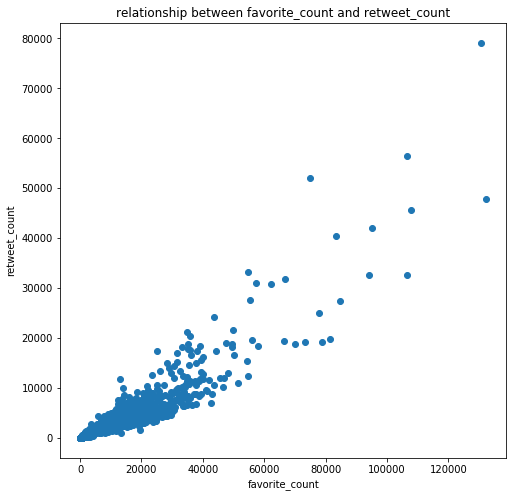

In [295]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(8,8)) 
plt.scatter(twitter_archive_master['favorite_count'],twitter_archive_master['retweet_count'])
plt.xlabel('favorite_count')
plt.ylabel('retweet_count')
plt.title('relationship between favorite_count and retweet_count')

###  在数据已知的stage中，哪个stage占比最高

In [297]:
# !pip3 install squarify

Text(0.5,1,'distribution of stage')

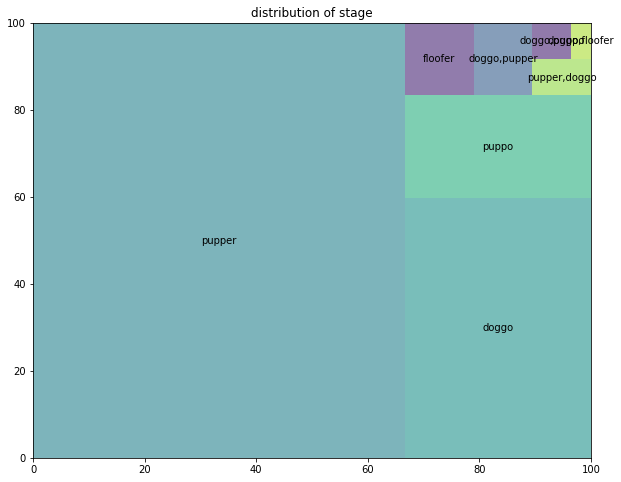

In [304]:
import squarify 
stage_count = twitter_archive_master.stage.str.split('|',expand=True).stack().value_counts()
labels = twitter_archive_master.stage.str.split('|',expand=True).stack().value_counts().index.tolist()
plt.figure(figsize=(10,8))
squarify.plot(sizes=stage_count,
              label=labels, alpha=.6 )
plt.title("distribution of stage")

### 用神经网络预测狗狗图片的结果中，哪种狗最受欢迎？

In [306]:
count = []
for index in twitter_archive_master.index:
    if twitter_archive_master.loc[index]['p1_dog'] == True:
        count.append(twitter_archive_master.loc[index]['p1'])
    elif twitter_archive_master.loc[index]['p2_dog'] == True:
        count.append(twitter_archive_master.loc[index]['p2'])
    elif twitter_archive_master.loc[index]['p3_dog'] == True:
        count.append(twitter_archive_master.loc[index]['p3'])
count = pd.Series(count)
count_top10 = count.value_counts()[:10]
count_top10

golden_retriever      158
Labrador_retriever    108
Pembroke               95
Chihuahua              91
pug                    62
toy_poodle             51
chow                   48
Samoyed                42
Pomeranian             42
malamute               33
dtype: int64

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Series.data is deprecated and will be removed in a future version
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5,1,'pie of stage')

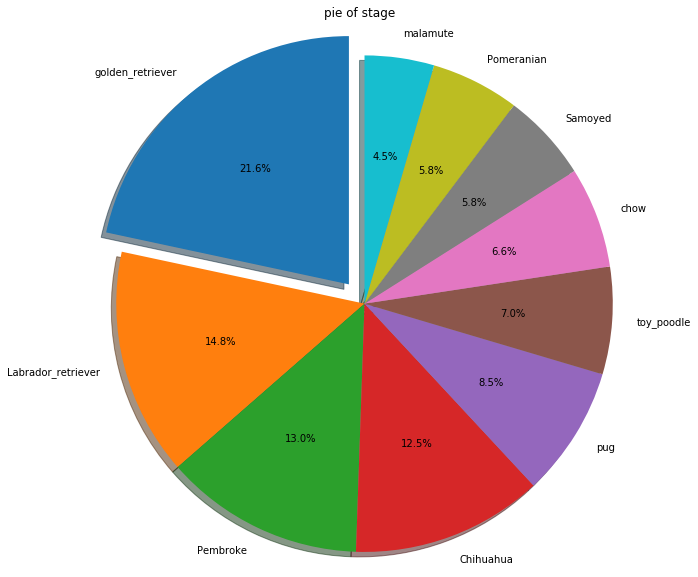

In [310]:
plt.figure(figsize=(10,10))
explode = (0.1,0,0,0,0,0,0,0,0,0)
plt.pie(count_top10.data,labels=count_top10.index,explode = explode,autopct = '%3.1f%%',shadow = True,startangle = 90)
plt.axis('equal')
plt.title('pie of stage')